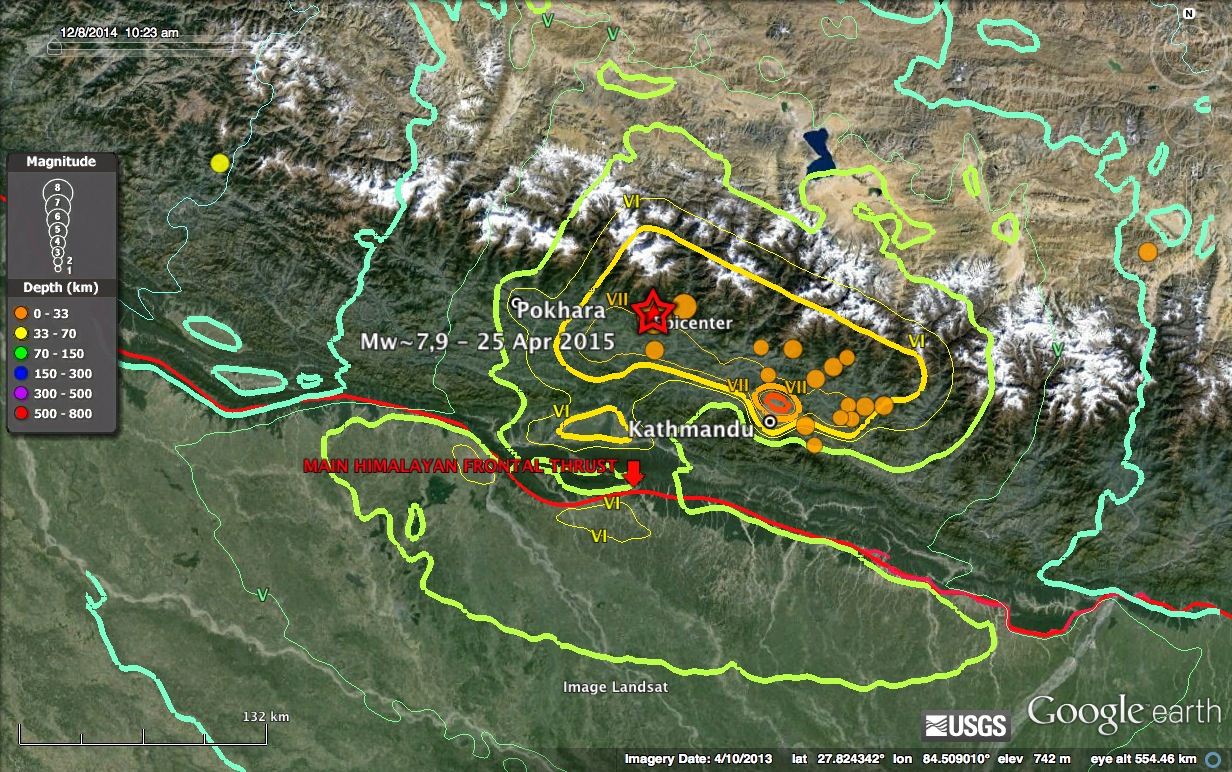

# Nepal Earthquake Tweet Analysis


##### On April 25th 2015, just before noon, Nepal experienced an earthquake of magnitude 7.8 on the moment magnitude scale. The earthquake ripped through Kathmandu valley, and a series of aftershocks leveled entire villages.

##### Immediately after the earthquake, volunteers from around the world were instrumental in guiding emergency operations, using satellite imagery to identify infrastructure destruction throughout the region.

##### People on the ground in Nepal were also generating tremendous amounts of information which could be of use to rescue operations, albeit less directly: on twitter. Between April 25th and May 28th, 33,610 tweets were tweeted by people in Nepal. These tweets were full of useful information, but 33,610 tweets is simply too many for a rescue operation to comb through.

##### However, messages posted on microblogging sites often contain rumors and overstated facts. In such situations, identification of factual or fact-checkable tweets, i.e., tweets that report some relevant and verifiable fact (other than sympathy or prayer) is extremely important for effective coordination of post-disaster relief operations. Additionally, cross verification of such critical information is a practical necessity and resource availability. Hence, automated Machine Learning techniques are needed to identify the tweets that talk about the need of resources or availability of resources.

In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [328]:
data = pd.read_csv('train.csv')

In [329]:
data.head()

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...


In [330]:
data.tail()

,TweetClass,TweetID,TweetText
18228,2,592697535271174145,#Earthquake in #Nepal #GoldenTemple Temple to ...
18229,2,592697135390416899,Nepal Earthquake Eerts from AIIMS Safdarjung H...
18230,2,592698989507715075,UNHCR rushes plastic sheeting and solar-powere...
18231,1,5644654646545646,Urgent medical need food water needed medicine...
18232,2,543533654345435,Available plenty medicine food water


In [331]:
data.shape

(18233, 3)

In [332]:
data.columns

Index(['TweetClass', 'TweetID', 'TweetText'], dtype='object')

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18233 non-null int64
TweetID       18233 non-null int64
TweetText     18224 non-null object
dtypes: int64(2), object(1)
memory usage: 427.4+ KB


In [334]:
data.describe()

,TweetClass,TweetID
count,18233.000000,1.823300e+04
mean,0.083749,5.923055e+17
std,0.386754,6.178048e+15
min,0.000000,5.435337e+14
25%,0.000000,5.921631e+17
50%,0.000000,5.925189e+17
75%,0.000000,5.926002e+17
max,2.000000,5.927001e+17


In [335]:
data.isnull().sum()

TweetClass    0
TweetID       0
TweetText     9
dtype: int64

In [336]:
data.columns

Index(['TweetClass', 'TweetID', 'TweetText'], dtype='object')

In [337]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
TweetClass    18233 non-null int64
TweetID       18233 non-null int64
TweetText     18224 non-null object
dtypes: int64(2), object(1)
memory usage: 427.4+ KB


In [338]:
data['TweetClass'].value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

In [339]:
data.sum().duplicated()

TweetClass    False
TweetID       False
dtype: bool

In [340]:
dupli=data.duplicated()
type(dupli)


pandas.core.series.Series

In [341]:
irrelevant_data=data[data['TweetClass']==0] 
print(irrelevant_data.shape)

(17370, 3)


In [342]:
available_data=data[data['TweetClass']==2]  
print(available_data.shape)

(664, 3)


In [343]:
need_data=data[data['TweetClass']==1]  
print(need_data.shape)

(199, 3)


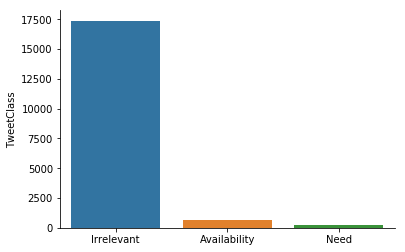

In [344]:
sns.barplot(x = ["Irrelevant", 'Availability','Need'], y = data['TweetClass'].value_counts(), data = data)
sns.despine()

In [345]:
x=data['TweetText']
y=data['TweetClass']

In [346]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=6,stratify=y)

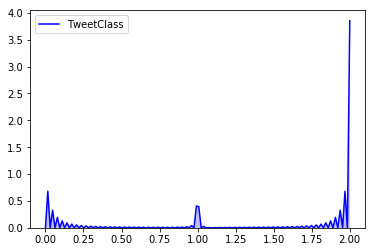

In [347]:
#kde plot
sns.kdeplot(data = data.TweetClass , color = 'blue' , shade = True , kernel = 'gau' , legend = True)

In [348]:
irrelevant_data=data[data['TweetClass']==0]
need_data=data[data['TweetClass']==1]
available_data=data[data['TweetClass']==2]
print(irrelevant_data.shape)
print(need_data.shape)
print(available_data.shape)

(17370, 3)
(199, 3)
(664, 3)


In [349]:
need_data.head()

,TweetClass,TweetID,TweetText
17370,1,591922042481479680,Nepal seeks mobile medical assistance from India
17371,1,591979790627840000,Nepalis r w/o water &amp electricity Water is ...
17372,1,591985311665684480,The wounded and untimely families need to take...
17373,1,591989264256106499,they are in search of blood donors for the peo...
17374,1,591987020924260354,Walked all around central &amp old KTM.Shops o...


In [350]:
available_data.head()

,TweetClass,TweetID,TweetText
17568,2,591915875638325248,Indian Prime Minister Narendra Modi has announ...
17569,2,591933551798419456,Phone from NTC does not take money when you ca...
17570,2,591939270673182721,India has sent 5 helicopters for relief and re...
17571,2,591968116919410690,NDRF personnel relief material was sent to Nep...
17572,2,591974898139987968,#SriLanka to fly emergency medical help food t...


In [351]:
irrelevant_data.head()

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...


In [352]:
vectorizer_train=TfidfVectorizer(lowercase=True)
dtm_train=vectorizer_train.fit_transform(x_train.values.astype('U'))
dtm_test=vectorizer_train.transform(x_test.values.astype('U'))

In [353]:
reg = LogisticRegression()
reg.fit(dtm_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [354]:
pred=reg.predict(dtm_test)

In [355]:
score=accuracy_score(y_test,pred)
print(score*100)

96.28884826325411


In [356]:
print(confusion_matrix(y_test,pred))

[[5193    1   17]
 [  54    4    2]
 [ 129    0   70]]


In [357]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5211
          1       0.80      0.07      0.12        60
          2       0.79      0.35      0.49       199

avg / total       0.96      0.96      0.95      5470



In [358]:
f1_reg = f1_score(pred,y_test,average='weighted')
print(f1_reg*100)

97.21778730837971


In [359]:
model = MultinomialNB()
model.fit(dtm_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [360]:
pred_nvm= model.predict(dtm_test)


In [361]:
score2=accuracy_score(y_test, pred_nvm)
print(score2*100)

95.3382084095064


In [362]:
print(confusion_matrix(y_test, pred_nvm))

[[5208    0    3]
 [  60    0    0]
 [ 192    0    7]]


In [363]:
print(classification_report(y_test, pred_nvm))


             precision    recall  f1-score   support

          0       0.95      1.00      0.98      5211
          1       0.00      0.00      0.00        60
          2       0.70      0.04      0.07       199

avg / total       0.93      0.95      0.93      5470



C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [364]:
f1_nvm = f1_score(pred_nvm,y_test,average='weighted')
print(f1_nvm*100)

97.44414510012103


C:\Users\Kavya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [365]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(dtm_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [366]:
pred_knn=knn.predict(dtm_test)

In [367]:
score3=accuracy_score(y_test, pred_knn)
print(score3*100)

96.672760511883


In [368]:
print(confusion_matrix(y_test, pred_knn))

[[5154    2   55]
 [  42   16    2]
 [  77    4  118]]


In [369]:
print(classification_report(y_test, pred_knn))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      5211
          1       0.73      0.27      0.39        60
          2       0.67      0.59      0.63       199

avg / total       0.96      0.97      0.96      5470



In [370]:
f1_knn = f1_score(pred_knn,y_test,average='weighted')
print(f1_knn*100)


96.95599197959457


In [371]:
model1=SVC(kernel='linear')
model1.fit(dtm_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [372]:
pred_svc=model1.predict(dtm_test)


In [373]:
score4=accuracy_score(y_test, pred_svc)
print(score4*100)

97.0201096892139


In [374]:
print(confusion_matrix(y_test, pred_svc))


[[5173    2   36]
 [  41   16    3]
 [  79    2  118]]


In [375]:
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      5211
          1       0.80      0.27      0.40        60
          2       0.75      0.59      0.66       199

avg / total       0.97      0.97      0.97      5470



In [376]:
f1_svc = f1_score(pred_svc,y_test,average='weighted')
print(f1_svc*100)

97.35762219825263


In [377]:
dtc=DecisionTreeClassifier()
dtc.fit(dtm_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [378]:
pred_dtc=dtc.predict(dtm_test)

In [379]:
score5=accuracy_score(y_test, pred_dtc)
print(score5*100)


95.94149908592323


In [380]:
print(confusion_matrix(y_test, pred_dtc))


[[5119   20   72]
 [  33   17   10]
 [  78    9  112]]


In [381]:
print(classification_report(y_test, pred_dtc))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      5211
          1       0.37      0.28      0.32        60
          2       0.58      0.56      0.57       199

avg / total       0.96      0.96      0.96      5470



In [382]:
f1_dtc = f1_score(pred_dtc,y_test,average='weighted')
print(f1_dtc*100)

96.04469974523117


In [383]:
dtc2=DecisionTreeClassifier(criterion='entropy')
dtc2.fit(dtm_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [384]:
pred_dtc2=dtc2.predict(dtm_test)

In [385]:
score6=accuracy_score(y_test, pred_dtc2)
print(score6*100)

96.19744058500915


In [386]:
print(confusion_matrix(y_test, pred_dtc2))

[[5131   17   63]
 [  32   22    6]
 [  80   10  109]]


In [387]:
print(classification_report(y_test, pred_dtc2))


             precision    recall  f1-score   support

          0       0.98      0.98      0.98      5211
          1       0.45      0.37      0.40        60
          2       0.61      0.55      0.58       199

avg / total       0.96      0.96      0.96      5470



In [388]:
f1_dtc2 = f1_score(pred_dtc2,y_test,average='weighted')
print(f1_dtc2*100)


96.33298609993784


In [389]:
rfc=RandomForestClassifier()
rfc.fit(dtm_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [390]:
pred_rfc=rfc.predict(dtm_test)

In [391]:
score7=accuracy_score(y_test, pred_rfc)
print(score7*100)


96.28884826325411


In [392]:
print(confusion_matrix(y_test, pred_rfc))

[[5192    1   18]
 [  51    7    2]
 [ 131    0   68]]


In [393]:
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5211
          1       0.88      0.12      0.21        60
          2       0.77      0.34      0.47       199

avg / total       0.96      0.96      0.95      5470



In [394]:
f1_rfc = f1_score(pred_rfc,y_test,average='weighted')
print(f1_rfc*100)


97.17184264546061


In [395]:
rfc2=RandomForestClassifier(criterion='entropy')
rfc2.fit(dtm_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [396]:
pred_rfc2=rfc2.predict(dtm_test)

In [397]:
score8=accuracy_score(y_test, pred_rfc2)
print(score8*100)

96.36197440585009


In [398]:
print(confusion_matrix(y_test, pred_rfc2))

[[5199    1   11]
 [  48   10    2]
 [ 137    0   62]]


In [399]:
print(classification_report(y_test, pred_rfc2))


             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5211
          1       0.91      0.17      0.28        60
          2       0.83      0.31      0.45       199

avg / total       0.96      0.96      0.95      5470



In [400]:
f1_rfc2 = f1_score(pred_rfc2,y_test,average='weighted')
print(f1_rfc2*100)

97.27480519912277


In [401]:
Accuracy = [score, score2, score3, score4, score5, score6, score7, score8]
F1_Score = [f1_reg, f1_nvm, f1_knn, f1_svc, f1_dtc, f1_dtc2, f1_rfc, f1_rfc2]
data = { 'Accuracy' : Accuracy,
        'F1_Score' : F1_Score,
         'Algorithm': ['Logistic Regression',"Naive Baye's",'KNeighbors','SVM linear',"Decision Tree(gini)",
                       'Decision Tree(entropy)','Random Forest Classifier(gini)','Random Forest Classifier(entropy)']}
dt = pd.DataFrame(data)

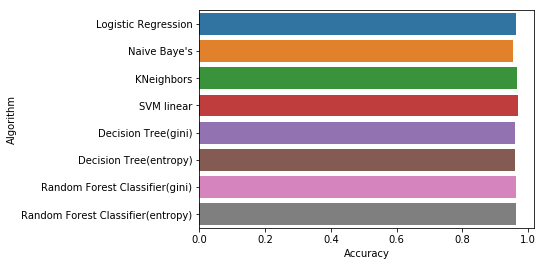

In [402]:
sns.barplot(x = dt.Accuracy, y = dt.Algorithm)

In [403]:
results = pd.DataFrame({"Algorithm":dt.Algorithm,"F1 score":dt.F1_Score*100,"Accuracy":dt.Accuracy*100})
results

,Algorithm,F1 score,Accuracy
0,Logistic Regression,97.217787,96.288848
1,Naive Baye's,97.444145,95.338208
2,KNeighbors,96.955992,96.672761
3,SVM linear,97.357622,97.020110
4,Decision Tree(gini),96.044700,95.941499
5,Decision Tree(entropy),96.332986,96.197441
6,Random Forest Classifier(gini),97.171843,96.288848
7,Random Forest Classifier(entropy),97.274805,96.361974
